<a href="https://colab.research.google.com/github/Harish-lvrk/PyTorch/blob/main/pytorch_training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## pipe line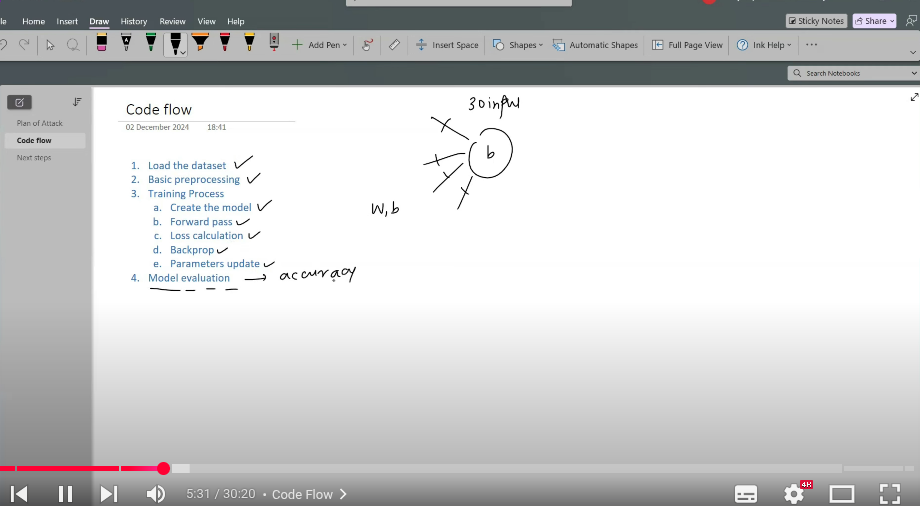

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True) # these are not requierd

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

This code snippet performs a train-test split on your data using the train_test_split function from the sklearn.model_selection module.

X_train, X_test, y_train, y_test: These are the variables that will store the resulting data splits.
X_train: The features for the training set.
X_test: The features for the testing set.
y_train: The target variable for the training set.
y_test: The target variable for the testing set.
df.iloc[:, 1:]: This selects all rows and all columns from the second column onwards (index 1 to the end) of your DataFrame df. This is assumed to be your feature data (X).
df.iloc[:, 0]: This selects all rows and only the first column (index 0) of your DataFrame df. This is assumed to be your target variable (y).
test_size=0.2: This specifies that 20% of the data should be allocated to the testing set, and the remaining 80% will be used for the training set.
In essence, this code is preparing your data for machine learning by dividing it into sets for training and evaluating your model.

### scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.69262122, -0.65600859, -0.56628428, ...,  1.0486296 ,
         4.4145452 ,  1.01176864],
       [ 0.42537665,  0.18867468,  0.40087225, ...,  0.46311532,
         1.65163367,  1.195071  ],
       [ 1.14995249, -0.19569073,  1.05629387, ...,  0.60266795,
         0.43074014, -0.8007683 ],
       ...,
       [-1.26520595, -0.56164343, -1.24177819, ..., -0.97124297,
        -0.61330223,  0.02409235],
       [-1.34247517, -1.60886655, -1.33026011, ..., -0.83578591,
        -0.74206228, -0.35059925],
       [-0.50581651, -1.51910457, -0.5728385 , ..., -1.37382195,
        -1.00578769, -0.75224708]])

In [ ]:
y_train

,diagnosis
146,M
223,M
186,M
295,B
207,M
...,...
514,M
488,B
110,B
21,B


### Label Encoding

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

### Numpy arrays to PyTorch tensors

In [ ]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
y_train_tensor.shape

torch.Size([455])

### Defining the model

In [ ]:
class MySimpleNN():

  def __init__(self, X):

    self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True) # this is says no of featues
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss





### Important Parameters

In [ ]:
learning_rate = 0.1
epochs = 25

### Training Pipeline

In [ ]:
# create model
model = MySimpleNN(X_train_tensor)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model.forward(X_train_tensor)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 3.733299022570061
Epoch: 2, Loss: 3.609860779354345
Epoch: 3, Loss: 3.480679306710126
Epoch: 4, Loss: 3.343671633576389
Epoch: 5, Loss: 3.2052717999310834
Epoch: 6, Loss: 3.0682082899113583
Epoch: 7, Loss: 2.929303108917537
Epoch: 8, Loss: 2.785211912068729
Epoch: 9, Loss: 2.63879974591106
Epoch: 10, Loss: 2.4909816788458263
Epoch: 11, Loss: 2.340033506556771
Epoch: 12, Loss: 2.1901072267882835
Epoch: 13, Loss: 2.0411142051296984
Epoch: 14, Loss: 1.891630972604367
Epoch: 15, Loss: 1.7456238560826496
Epoch: 16, Loss: 1.608208338922876
Epoch: 17, Loss: 1.477793869201881
Epoch: 18, Loss: 1.3568863581192243
Epoch: 19, Loss: 1.2501322968640498
Epoch: 20, Loss: 1.1583450821792856
Epoch: 21, Loss: 1.0815761101650658
Epoch: 22, Loss: 1.0189588324319283
Epoch: 23, Loss: 0.9688654915996429
Epoch: 24, Loss: 0.9292781748204204
Epoch: 25, Loss: 0.8981256231549605


In [ ]:
model.bias

tensor([-0.0753], dtype=torch.float64, requires_grad=True)

### Evaluation

In [ ]:
# model evaluation
with torch.no_grad(): # gradient tracking is off on this block
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.7160664796829224
